Import Libraries


In [92]:



import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances





In [93]:

# Load the latest version
# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv",  # The actual file path within the dataset
)



C:\Users\mirol\AppData\Local\Temp\ipykernel_27500\3342878545.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [94]:

print("First 5 records:", df.head())


First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

Data Preprocessing


In [95]:
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())



Dataset shape: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null 

In [96]:

# Check for null values
print("\n Null values per column:")
print(df.isnull().sum())



 Null values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

In [97]:


# Percentage of missing values
print("\n Percentage of missing values per column:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])  # Only show columns with missing values



 Percentage of missing values per column:
Unnamed: 32    100.0
dtype: float64


In [98]:


# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")



Total missing values in dataset: 569


In [99]:


# Rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {rows_with_missing}")



Number of rows with at least one missing value: 569


In [100]:


# Summary statistics
print("\nDataset Summary:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")




Dataset Summary:
   Total rows: 569
   Total columns: 33
   Total cells: 18777
   Missing cells: 569
   Missing percentage: 3.03%


In [101]:

# Display columns with missing values (if any)
cols_with_missing = df.columns[df.isnull().any()].tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo columns have missing values!")



Columns with missing values: ['Unnamed: 32']


In [102]:


#Check for empty strings or whitespace (in object columns)
print("\nChecking for empty strings in text columns:")
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_strings = (df[col] == '').sum()
    whitespace = df[col].str.isspace().sum() if df[col].dtype == 'object' else 0
    if empty_strings > 0 or whitespace > 0:
        print(f"   {col}: {empty_strings} empty strings, {whitespace} whitespace-only")



Checking for empty strings in text columns:


In [103]:

df = df.drop(columns=['Unnamed: 32'], errors='ignore')



In [104]:

# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset after preprocessing: {total_missing}")




Total missing values in dataset after preprocessing: 0


In [105]:

# Summary statistics
print("\nDataset Summary after preprocessing:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")



Dataset Summary after preprocessing:
   Total rows: 569
   Total columns: 32
   Total cells: 18208
   Missing cells: 0
   Missing percentage: 0.00%


In [106]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values
y_binary = (y == 'M').astype(int)  # Convert to binary: 1=Malignant, 0=Benign

In [107]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [108]:
# Verify scaling
print("\nFirst 5 records after scaling:")
print(X_scaled[:5])
print("\nScaled dataset shape:", X_scaled.shape)



First 5 records after scaling:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388

1.PCA

2.Autoencoders

3.K-Means

In [109]:

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    # #setting K
    # K = centroids.shape[0]

    # idx = np.zeros(X.shape[0], dtype=int)

    # for i in range (X.shape[0]):
    #     distance=[]
    #     for j in range(centroids.shape[0]):
    #         norm_ij= np.linalg.norm(X[i] - centroids[j]) 
    #         distance.append(norm_ij)
    #     idx[i]=np.argmin(distance)        
            
            
    # return idx


#with vectorization
    # Compute squared distances
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [110]:

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:  # Handle empty clusters
            centroids[k] = np.mean(points, axis=0)
        else:
            # Reinitialize empty cluster to a random point
            centroids[k] = X[np.random.choice(m)]
    
    return centroids

 

In [111]:
def compute_inertia(X, idx, centroids):
    return np.sum((X - centroids[idx]) ** 2)


In [112]:

def kMeans_init_centroids_random(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids



In [113]:

def kMeans_init_centroids_plusplus(X, K):
    """
    Initialize K centroids using K-Means++ algorithm
    
    Args:
        X (ndarray): (m, n) Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): (K, n) Initialized centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    # Step 1: Choose first centroid randomly
    centroids[0] = X[np.random.choice(m)]
    
    # Step 2: Choose remaining centroids
    for k in range(1, K):
        # Compute distances to nearest centroid for each point
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids[:k]]) for x in X])
        
        # Choose next centroid with probability proportional to distance squared
        probabilities = distances / distances.sum()
        cumulative_probs = probabilities.cumsum()
        r = np.random.rand()
        
        for idx, prob in enumerate(cumulative_probs):
            if r < prob:
                centroids[k] = X[idx]
                break
    
    return centroids


In [114]:
   
def run_kMeans(X, initial_centroids, max_iters=100, epsilon=1e-4, verbose=True):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m,dtype=int )
    inertia_history = []


    # Run K-Means
    for i in range(max_iters):
        if verbose:
            print(f"K-Means iteration {i+1}/{max_iters}")
        
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Compute inertia (WCSS) (within-cluster sum of squares)
        inertia = compute_inertia(X, idx, centroids)
        inertia_history.append(inertia)

        new_centroids = compute_centroids(X, idx, K)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"  Inertia: {inertia:.4f}, Centroid shift: {centroid_shift:.6f}")


        if centroid_shift < epsilon:
            if verbose:
                print(f"Converged at iteration {i+1}")
            centroids = new_centroids
            return centroids, idx,inertia_history,i+1
        
        centroids = new_centroids
    if verbose:
        print(f"Reached maximum iterations ({max_iters})")
    return centroids, idx,inertia_history,max_iters
    



In [115]:
k_vals = list(range(2, 11))   # K values to test
n_runs = 10                   # runs per K
max_iters = 100
random_state = 42
inertias = []
np.random.seed(random_state)

# Store results
inertia_means_random = []
inertia_stds_random = []
iters_means_random = []
iters_stds_random = []
silhouette_scores_random = []

inertia_means_plusplus = []
inertia_stds_plusplus = []
iters_means_plusplus = []
iters_stds_plusplus = []
silhouette_scores_plusplus = []

gap_values = []  # Gap statistic


In [116]:
def compute_gap_statistic(X, K, n_refs=5):
    # Generate reference datasets
    ref_inertia = []
    for _ in range(n_refs):
        X_ref = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
        centroids = kMeans_init_centroids_plusplus(X_ref, K)
        _, _, inertia_hist, _ = run_kMeans(X_ref, centroids, max_iters=max_iters, verbose=False)
        ref_inertia.append(inertia_hist[-1])
    # Compute original dataset inertia
    centroids = kMeans_init_centroids_plusplus(X, K)
    _, _, inertia_hist, _ = run_kMeans(X, centroids, max_iters=max_iters, verbose=False)
    return np.log(np.mean(ref_inertia)) - np.log(inertia_hist[-1])

In [117]:
for K in k_vals:
    random_inertia = []
    random_iters = []
    random_sil = []

    plusplus_inertia = []
    plusplus_iters = []
    plusplus_sil = []

    for run in range(n_runs):
        # --- Random Initialization ---
        centroids = kMeans_init_centroids_random(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        random_inertia.append(inertia_hist[-1])
        random_iters.append(n_iters)
        random_sil.append(silhouette_score(X_scaled, idx))

        # --- K-Means++ Initialization ---
        centroids = kMeans_init_centroids_plusplus(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        plusplus_inertia.append(inertia_hist[-1])
        plusplus_iters.append(n_iters)
        plusplus_sil.append(silhouette_score(X_scaled, idx))

    # Aggregate results
    inertia_means_random.append(np.mean(random_inertia))
    inertia_stds_random.append(np.std(random_inertia))
    iters_means_random.append(np.mean(random_iters))
    iters_stds_random.append(np.std(random_iters))
    silhouette_scores_random.append(np.mean(random_sil))

    inertia_means_plusplus.append(np.mean(plusplus_inertia))
    inertia_stds_plusplus.append(np.std(plusplus_inertia))
    iters_means_plusplus.append(np.mean(plusplus_iters))
    iters_stds_plusplus.append(np.std(plusplus_iters))
    silhouette_scores_plusplus.append(np.mean(plusplus_sil))

    # Gap statistic
    gap = compute_gap_statistic(X_scaled, K)
    gap_values.append(gap)

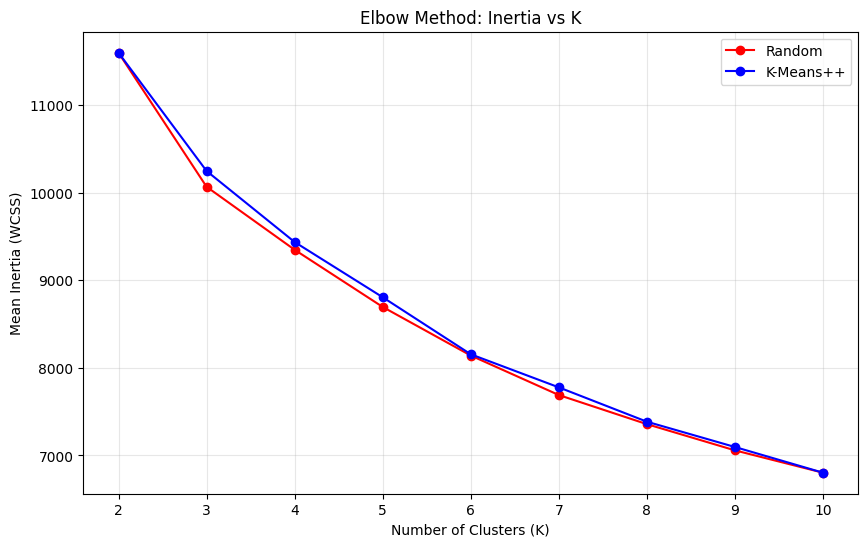

In [118]:
# Elbow method
plt.figure(figsize=(10,6))
plt.plot(k_vals, inertia_means_random, 'ro-', label='Random')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia (WCSS)')
plt.title('Elbow Method: Inertia vs K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

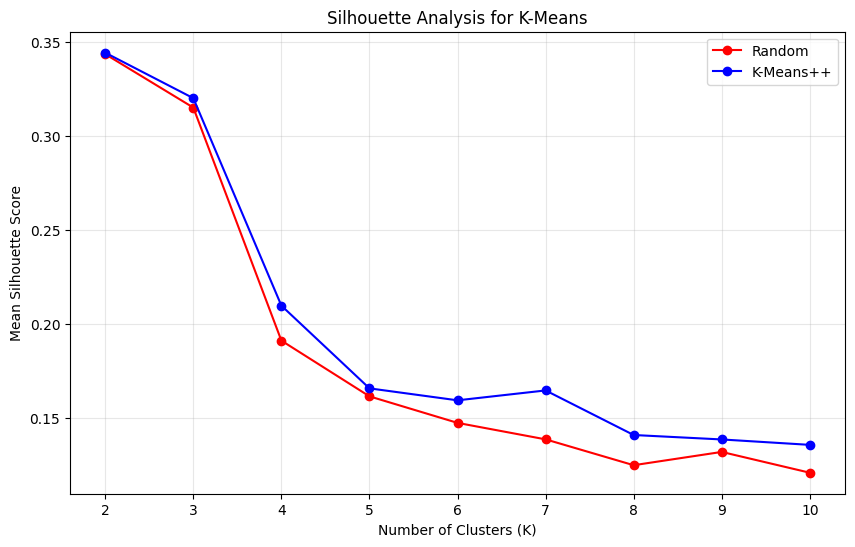

In [119]:
# Silhouette Analysis
plt.figure(figsize=(10,6))
plt.plot(k_vals, silhouette_scores_random, 'ro-', label='Random')
plt.plot(k_vals, silhouette_scores_plusplus, 'bo-', label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

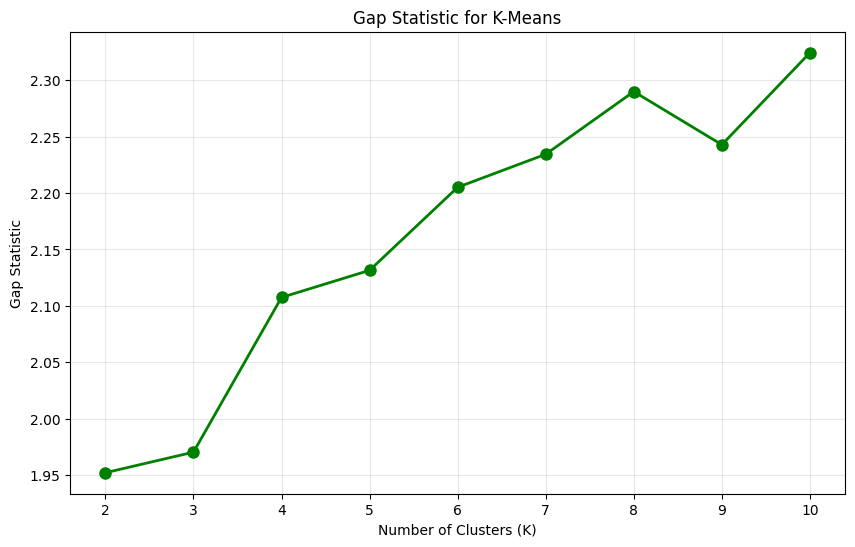

In [120]:
# Gap Statistic
plt.figure(figsize=(10,6))
plt.plot(k_vals, gap_values, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for K-Means')
plt.grid(True, alpha=0.3)
plt.show()

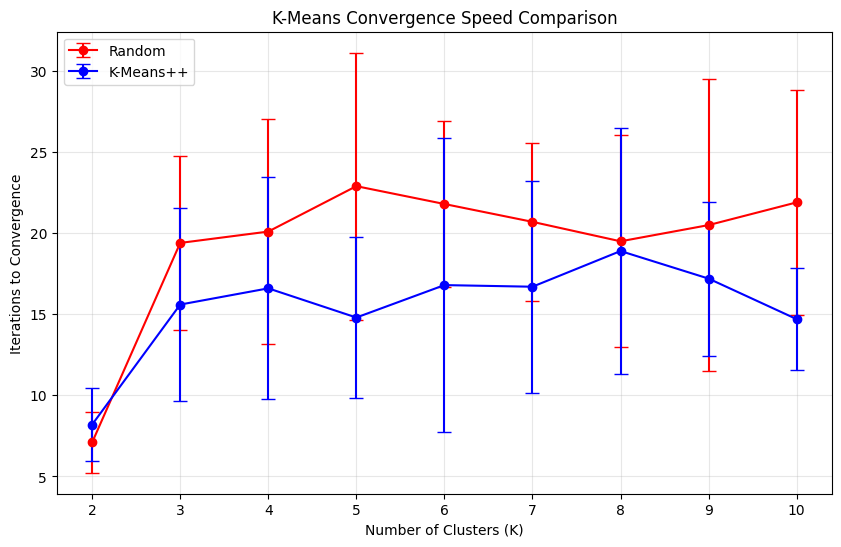

In [121]:
# Convergence speed comparison (iterations)
plt.figure(figsize=(10,6))
plt.errorbar(k_vals, iters_means_random, yerr=iters_stds_random, fmt='ro-', capsize=5, label='Random')
plt.errorbar(k_vals, iters_means_plusplus, yerr=iters_stds_plusplus, fmt='bo-', capsize=5, label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Iterations to Convergence')
plt.title('K-Means Convergence Speed Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [122]:
results = {
    'random': {'inertias': [], 'iterations': []},
    'plusplus': {'inertias': [], 'iterations': []}
}


In [123]:
print("Testing Random Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_random(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=True
    )

    results['random']['inertias'].append(inertia_history[-1])
    results['random']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")


Testing Random Initialization:
K-Means iteration 1/100
  Inertia: 10557.8698, Centroid shift: 6.873935
K-Means iteration 2/100
  Inertia: 7889.3774, Centroid shift: 2.441911
K-Means iteration 3/100
  Inertia: 7547.5187, Centroid shift: 1.462264
K-Means iteration 4/100
  Inertia: 7443.2031, Centroid shift: 0.662672
K-Means iteration 5/100
  Inertia: 7417.6832, Centroid shift: 0.340533
K-Means iteration 6/100
  Inertia: 7407.8639, Centroid shift: 0.347733
K-Means iteration 7/100
  Inertia: 7398.5316, Centroid shift: 0.228700
K-Means iteration 8/100
  Inertia: 7395.0061, Centroid shift: 0.426827
K-Means iteration 9/100
  Inertia: 7373.3417, Centroid shift: 0.577025
K-Means iteration 10/100
  Inertia: 7352.4644, Centroid shift: 0.350221
K-Means iteration 11/100
  Inertia: 7337.9708, Centroid shift: 0.612005
K-Means iteration 12/100
  Inertia: 7303.3720, Centroid shift: 0.677983
K-Means iteration 13/100
  Inertia: 7260.0776, Centroid shift: 0.951640
K-Means iteration 14/100
  Inertia: 7207.

In [124]:
print("\nTesting K-Means++ Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_plusplus(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=False
    )

    results['plusplus']['inertias'].append(inertia_history[-1])
    results['plusplus']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")



Testing K-Means++ Initialization:
  Run 1: Inertia=6739.1009, Iterations=17
  Run 2: Inertia=6724.0721, Iterations=15
  Run 3: Inertia=6846.3365, Iterations=9
  Run 4: Inertia=6884.8354, Iterations=21
  Run 5: Inertia=6896.6649, Iterations=13
  Run 6: Inertia=6723.6310, Iterations=30
  Run 7: Inertia=6707.6734, Iterations=12
  Run 8: Inertia=6962.4394, Iterations=15
  Run 9: Inertia=6650.9505, Iterations=27
  Run 10: Inertia=6821.1792, Iterations=23


In [125]:
print("COMPARISON SUMMARY")
print("\nRandom Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['random']['inertias']):.4f} ± "
    f"{np.std(results['random']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['random']['iterations']):.2f} ± "
    f"{np.std(results['random']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['random']['inertias']):.4f}")
print("\nK-Means++ Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['plusplus']['inertias']):.4f} ± "
    f"{np.std(results['plusplus']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['plusplus']['iterations']):.2f} ± "
    f"{np.std(results['plusplus']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['plusplus']['inertias']):.4f}")





COMPARISON SUMMARY

Random Initialization:
  Mean Inertia: 6820.0144 ± 84.0741
  Mean Iterations: 21.30 ± 7.87
  Best Inertia: 6610.5308

K-Means++ Initialization:
  Mean Inertia: 6795.6883 ± 95.5946
  Mean Iterations: 18.20 ± 6.48
  Best Inertia: 6650.9505


In [126]:
# First, extract data from results
random_inertia = results['random']['inertias']
random_iters   = results['random']['iterations']

plusplus_inertia = results['plusplus']['inertias']
plusplus_iters   = results['plusplus']['iterations']

# Then compute means and standard deviations
inertia_means = [np.mean(random_inertia), np.mean(plusplus_inertia)]
inertia_stds  = [np.std(random_inertia), np.std(plusplus_inertia)]

iters_means = [np.mean(random_iters), np.mean(plusplus_iters)]
iters_stds  = [np.std(random_iters), np.std(plusplus_iters)]

# Prepare x-axis
methods = ['Random', 'K-Means++']
x = np.arange(len(methods))
width = 0.35


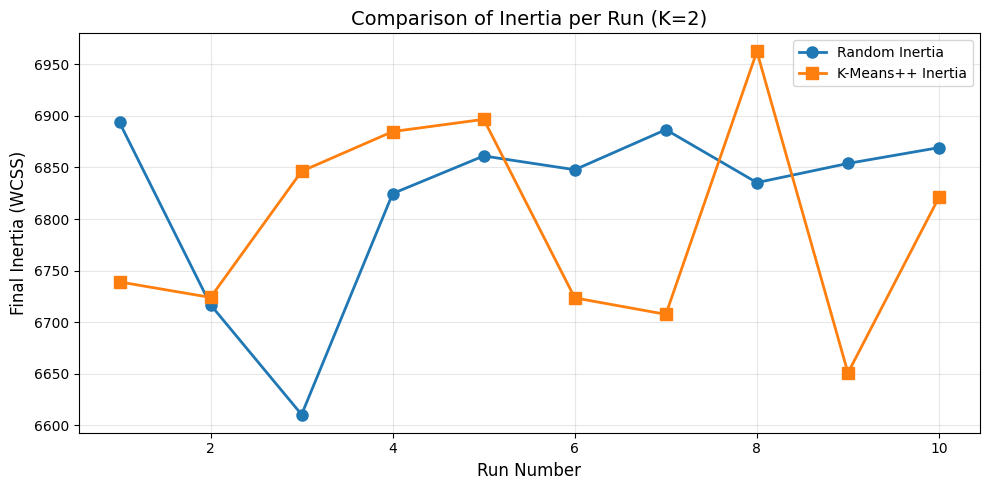

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_inertia)+1), random_inertia, 'o-', label='Random Inertia', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_inertia)+1), plusplus_inertia, 's-', label='K-Means++ Inertia', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Final Inertia (WCSS)', fontsize=12)
plt.title(f'Comparison of Inertia per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

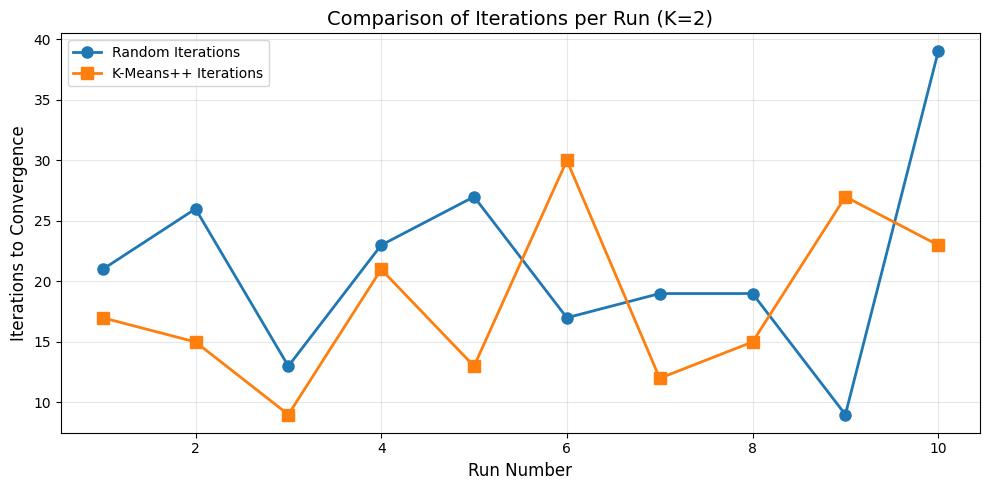

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_iters)+1), random_iters, 'o-', label='Random Iterations', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_iters)+1), plusplus_iters, 's-', label='K-Means++ Iterations', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Iterations to Convergence', fontsize=12)
plt.title(f'Comparison of Iterations per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

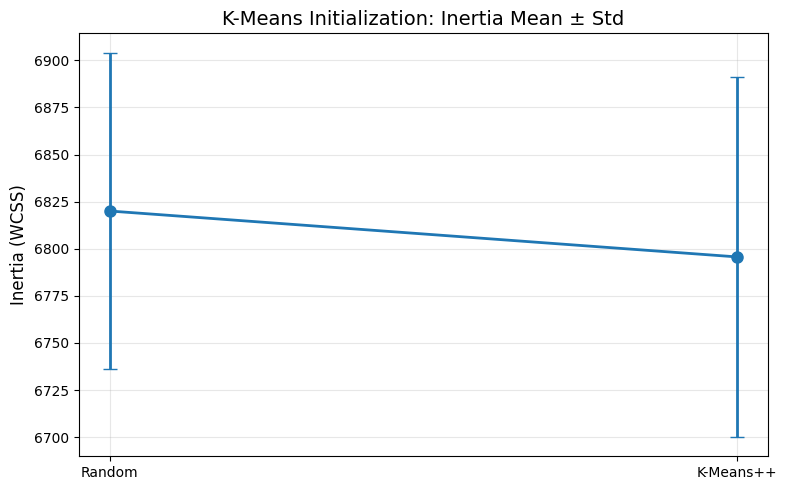

In [129]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, inertia_means, yerr=inertia_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('K-Means Initialization: Inertia Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

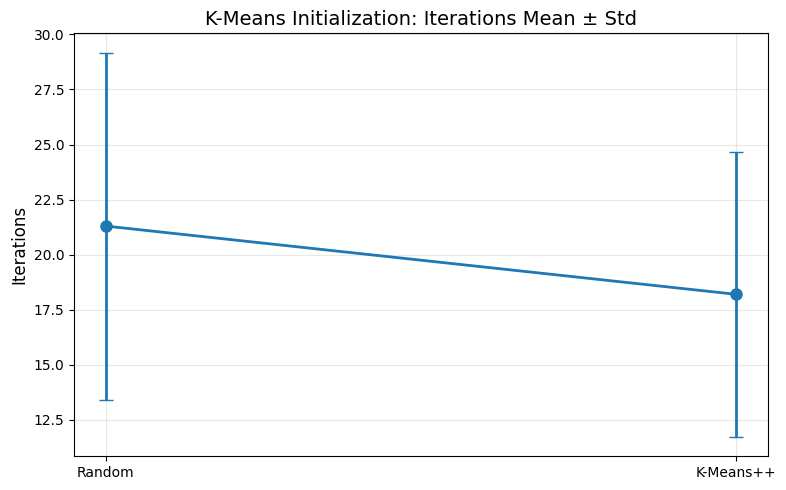

In [130]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, iters_means, yerr=iters_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Iterations', fontsize=12)
plt.title('K-Means Initialization: Iterations Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [131]:
k_vals = list(range(2, 11))
sklearn_inertias = []

print("Running sklearn K-Means:\n")

for K in k_vals:
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    
    kmeans.fit(X_scaled)
    sklearn_inertias.append(kmeans.inertia_)
    
    print(f"K = {K}: Inertia = {kmeans.inertia_:.4f}")


Running sklearn K-Means:

K = 2: Inertia = 11595.5266
K = 3: Inertia = 10061.7978
K = 4: Inertia = 9258.9891
K = 5: Inertia = 8558.6607
K = 6: Inertia = 7970.2638
K = 7: Inertia = 7540.3187
K = 8: Inertia = 7254.3262
K = 9: Inertia = 6837.6289
K = 10: Inertia = 6603.4044


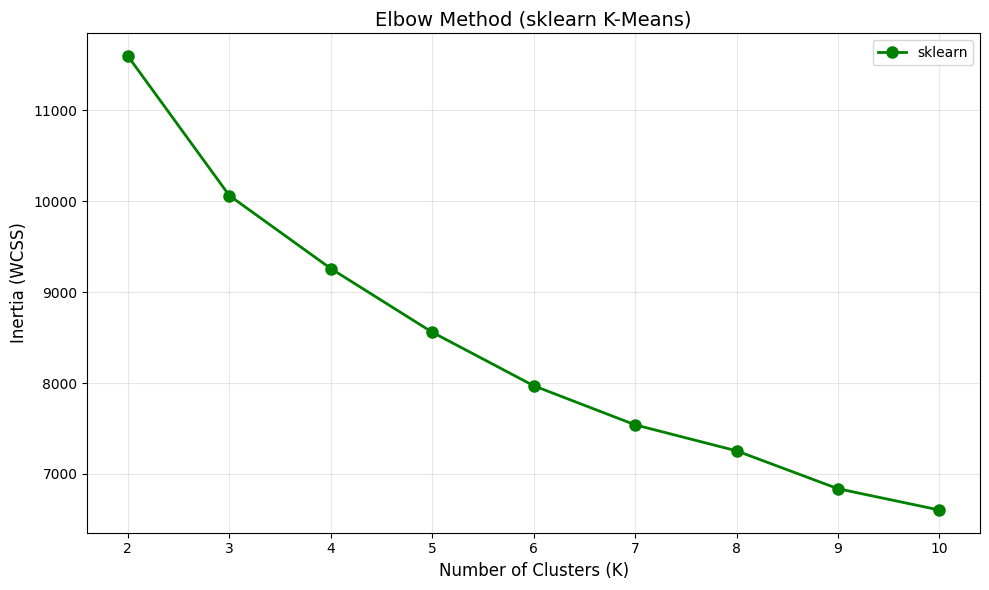

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, sklearn_inertias, 'go-', linewidth=2, markersize=8, label='sklearn')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method (sklearn K-Means)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


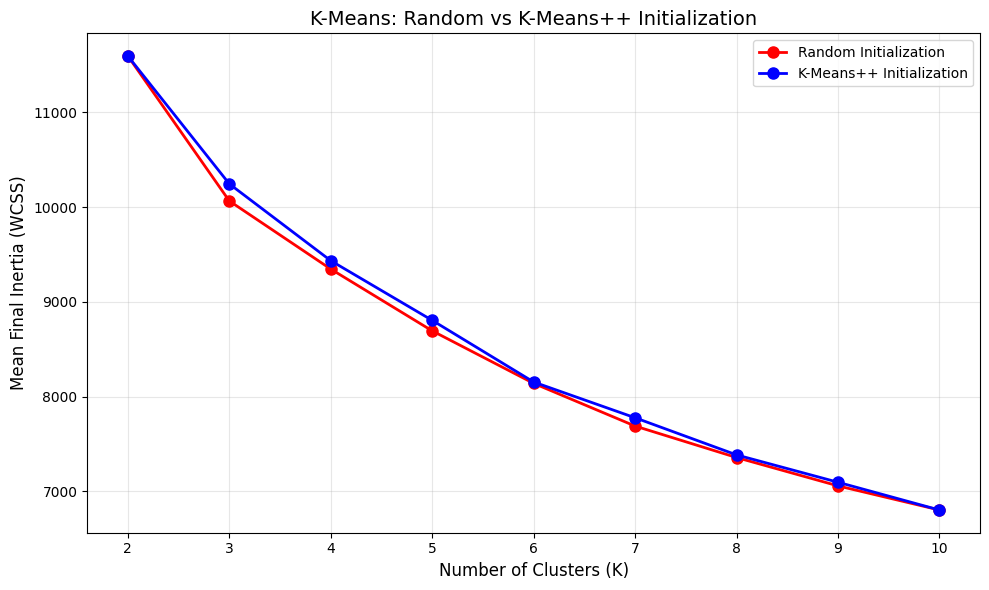

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, inertia_means_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ Initialization', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [138]:
# Store mean inertias for each K
mean_inertia_random = []
mean_inertia_plusplus = []
diff_random = []
diff_plusplus = []

for i, K in enumerate(k_vals):
    # Compute mean inertia from your multiple runs (replace with your actual mean lists)
    mean_r = inertia_means_random[i]
    mean_p = inertia_means_plusplus[i]

    # Compute differences from sklearn KMeans
    diff_r = abs(mean_r - sklearn_inertias[i])
    diff_p = abs(mean_p - sklearn_inertias[i])

    # Store in lists
    mean_inertia_random.append(mean_r)
    mean_inertia_plusplus.append(mean_p)
    diff_random.append(diff_r)
    diff_plusplus.append(diff_p)

    print(
        f"K={K}: Scratch Random={mean_r:.4f}, "
        f"Scratch K-Means++={mean_p:.4f}, "
        f"sklearn={sklearn_inertias[i]:.4f}, "
        f"Diff Random={diff_r:.4f}, "
        f"Diff K-Means++={diff_p:.4f}"
    )

K=2: Scratch Random=11595.6667, Scratch K-Means++=11595.6363, sklearn=11595.5266, Diff Random=0.1401, Diff K-Means++=0.1097
K=3: Scratch Random=10065.6934, Scratch K-Means++=10245.8772, sklearn=10061.7978, Diff Random=3.8956, Diff K-Means++=184.0794
K=4: Scratch Random=9346.5566, Scratch K-Means++=9435.0063, sklearn=9258.9891, Diff Random=87.5675, Diff K-Means++=176.0172
K=5: Scratch Random=8694.1385, Scratch K-Means++=8805.0105, sklearn=8558.6607, Diff Random=135.4779, Diff K-Means++=246.3498
K=6: Scratch Random=8139.6615, Scratch K-Means++=8154.0405, sklearn=7970.2638, Diff Random=169.3977, Diff K-Means++=183.7767
K=7: Scratch Random=7688.8213, Scratch K-Means++=7776.4593, sklearn=7540.3187, Diff Random=148.5026, Diff K-Means++=236.1406
K=8: Scratch Random=7356.5559, Scratch K-Means++=7384.4747, sklearn=7254.3262, Diff Random=102.2297, Diff K-Means++=130.1485
K=9: Scratch Random=7057.3524, Scratch K-Means++=7095.6230, sklearn=6837.6289, Diff Random=219.7235, Diff K-Means++=257.9941
K

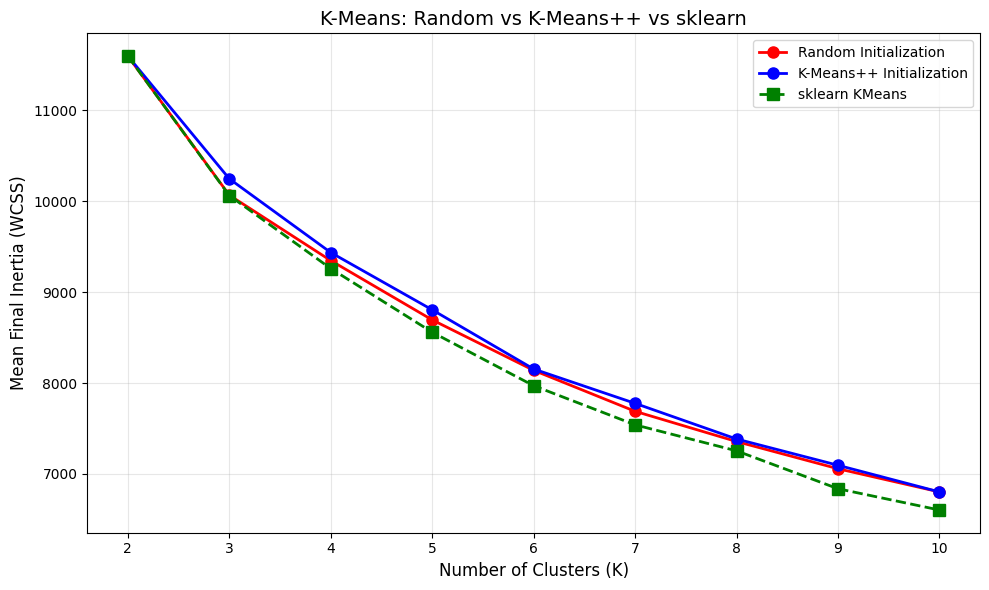

In [139]:

# Visualization
plt.figure(figsize=(10,6))
plt.plot(k_vals, mean_inertia_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, mean_inertia_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.plot(k_vals, sklearn_inertias, 'gs--', linewidth=2, markersize=8, label='sklearn KMeans')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ vs sklearn', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4.Gaussian Mixture Models (GMM)
